# HW 8-11

## Imports

In [1]:
import warnings

import numpy as np
import sympy as sp
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

warnings.filterwarnings("ignore")

## HW 8

In [2]:
# load data
dose: np.ndarray = pd.read_csv("dose.txt", header=None).values.astype(np.float64)
response: np.ndarray = pd.read_csv("response.txt", header=None).values.astype(np.float64)


In [3]:
# A
# l2: y = theta * (e^(-x)) + err => \theta_hat = (((A'A)^-1)A')y

y: np.ndarray = response
A: np.ndarray = np.exp(-dose)
theta_hat: float = (np.linalg.inv(A.T@A)@A.T@y)[0, 0]

print(f"Theta_hat: {theta_hat}")

Theta_hat: 3.829151013944661


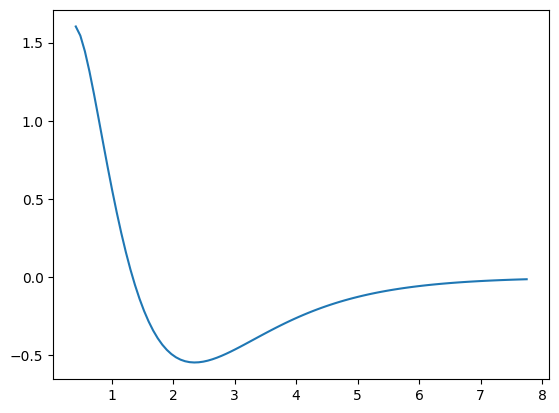

The minimum side effect is -0.5447697198802608, which occurs at a dose of 2.3584756360208416


In [4]:
# B
def side_effect(x: float, theta_hat: float) -> float:
    y = theta_hat*np.exp(-x)
    return x*(y**2) - x*y

# Plot the dosage-side-effect relationship
max_dose = dose.min()
min_dose = dose.max()
dose_range = np.linspace(min_dose, max_dose, 100)
side_effects = np.array(
    [side_effect(float(d), theta_hat) for d in dose_range]
).astype(np.float64)
plt.plot(dose_range, side_effects)
plt.show()

# find the lowest side effect by brute force
low_dose, low_effect = np.inf, np.inf
for i, d in enumerate(dose_range):
    se = side_effects[i]
    if se < low_effect:
        low_dose = d
        low_effect = se
lowest_dose, lowest_effect = np.inf, np.inf
for d in np.linspace(low_dose-0.5, low_dose+0.5, 10000):
    se = side_effect(d, theta_hat)
    if se<low_effect:
        lowest_dose = d
        lowest_effect = se

print(f"The minimum side effect is {lowest_effect}, which occurs at a dose of {lowest_dose}")

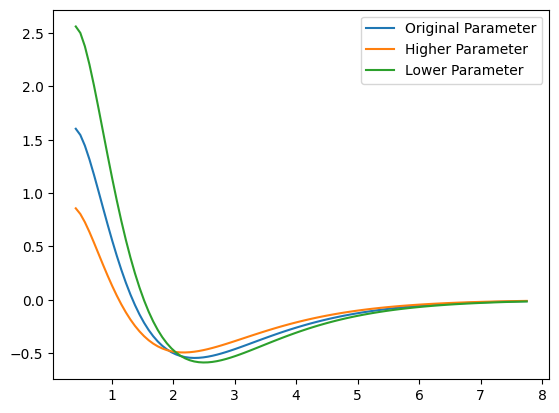

In [5]:
# C
# We can replicate the plot from B with a few different parameters

# adjust the parameter
theta_hat_lower = theta_hat*0.8
theta_hat_higher = theta_hat*1.2

# We saw this earlier:
max_dose = dose.min()
min_dose = dose.max()
dose_range = np.linspace(min_dose, max_dose, 100)
side_effects_og = np.array(
    [side_effect(float(d), theta_hat) for d in dose_range]
).astype(np.float64)

# now we'll just add for our lower/higher parameter
side_effects_low = np.array(
    [side_effect(float(d), theta_hat_lower) for d in dose_range]
).astype(np.float64)
side_effects_high = np.array(
    [side_effect(float(d), theta_hat_higher) for d in dose_range]
).astype(np.float64)

# plot
plt.plot(dose_range, side_effects_og, label="Original Parameter")
plt.plot(dose_range, side_effects_low, label="Higher Parameter")
plt.plot(dose_range, side_effects_high, label="Lower Parameter")
plt.legend()
plt.show()

Conclusion for 8.C: This plot demonstrates the changes in the dose-to-side-effect relationship as the parameter (which corresponds to the dose-to-response relationship) changes. As the parameter (theta) is lower, the recommended dosage increases.

# HW 9

In [6]:
# unit vectors on V
unit_vectors_v = [
    np.array([0, 1]),
    np.array([1, 0]),
    np.array([0, -1]),
    np.array([-1, 0])
]

Here is our matrix:
⎡    ⎛-√3    ⎞⎤
⎢1   ⎜────, 0⎟⎥
⎢    ⎝ 2     ⎠⎥
⎢             ⎥
⎣√3     0.5   ⎦


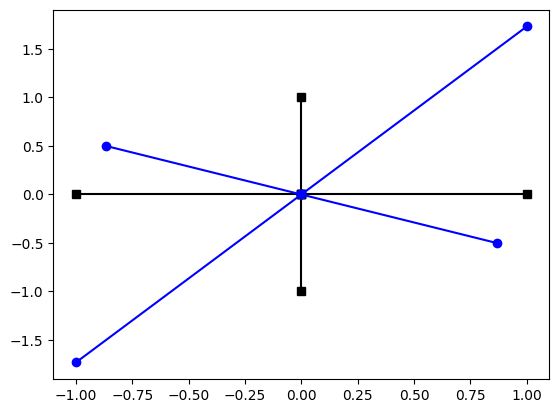

In [7]:
# A
A = np.array(
    [[1, -np.sqrt(3)/2],
     [np.sqrt(3), 1/2]]
)
A_sp = sp.Matrix(
    [[1, sp.div(-sp.sqrt(3), 2)],
     [sp.sqrt(3), 1/2]]    
)
print("Here is our matrix:")
sp.pprint(A_sp)

vectors_u = [A@v for v in unit_vectors_v]

for v in unit_vectors_v:
    plt.plot([0, v[0]], [0, v[1]], marker="s", color="black")
for u in vectors_u:
    plt.plot([0, u[0]], [0, u[1]], marker="o", color="blue")

In [8]:
# B
longest_norm = 0
longest_i = 0
for i, u in enumerate(vectors_u):
    norm = np.linalg.norm(u, 2)
    if norm > longest_norm:
        longest_norm = norm
        longest_i = i
    elif norm == longest_norm:
        print(f"{unit_vectors_v[i]} tied {unit_vectors_v[longest_i]} with identical norms")

print(f"The vector stretched most is {unit_vectors_v[longest_i]}.\n",
      f"It was transformed to {vectors_u[longest_i]},\n",
      f"with a norm of {longest_norm}")

[-1  0] tied [1 0] with identical norms
The vector stretched most is [1 0].
 It was transformed to [1.         1.73205081],
 with a norm of 1.9999999999999998


In [9]:
# C
U, S, Vh = np.linalg.svd(A)

print(f"The maximum singular value is {round(S.max(), 3)}, which is the same as the l2 norm {round(longest_norm, 3)}")

The maximum singular value is 2.0, which is the same as the l2 norm 2.0


In [10]:
# D: documentation at https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm
print(f"A has a Frobenius norm (default): {np.linalg.norm(A, "fro")}")
print(f"A has a nuclear norm: {np.linalg.norm(A, "nuc")}")
for norm_ord in [np.inf, -np.inf, 1, -1, 2, -2]:
    print(f"A has a(n) {norm_ord} norm: {np.linalg.norm(A, norm_ord)}")

# Not defined for matrices:
print(f"A does not have a 0 norm, but vectors do: {np.linalg.norm(u, 0)}")
print("Vectors can also have other norms based on the p-norm forumla we've discussed:\n",
      f"The l-10.34 norm of a vector is {np.linalg.norm(u, 10.34)}\n",
      f"The l-(-5.6) norm of a vector is {np.linalg.norm(u, -5.6)}")

A has a Frobenius norm (default): 2.2360679774997894
A has a nuclear norm: 3.0
A has a(n) inf norm: 2.232050807568877
A has a(n) -inf norm: 1.8660254037844386
A has a(n) 1 norm: 2.732050807568877
A has a(n) -1 norm: 1.3660254037844386
A has a(n) 2 norm: 2.0
A has a(n) -2 norm: 0.9999999999999999
A does not have a 0 norm, but vectors do: 2.0
Vectors can also have other norms based on the p-norm forumla we've discussed:
 The l-10.34 norm of a vector is 1.7326218316972286
 The l-(-5.6) norm of a vector is 0.9919778039857362


## HW 10

In [11]:
A = np.array(
    [[-3/5, 4/5],
     [4/5, -1]]
)
A_sp = sp.Matrix(
    [[-3/5, 4/5],
     [4/5, -1]]
)
b_data = np.array(
    [[1],
     [2]]
)
b_data_sp = sp.Matrix(
    [[1],
     [2]]
)

In [12]:
# A
x = np.linalg.solve(A, b_data)
x

array([[65.],
       [50.]])

In [13]:
# B
# here's the "size" of x
np.linalg.norm(x)

# Discussion
# The shape/dimensions in x are the same as b, but 
# the values are more than an order of magnitude larger than the values in b.

np.float64(82.00609733428355)

In [14]:
# C
epsilon = np.array(
    [[0.1],
     [-0.1]]
)

b_data_epsilon = b_data + epsilon
x_epsilon = np.linalg.solve(A, b_data_epsilon)
print(f"new x: {x_epsilon}")

# how big are these now?
print(f"norm of epsilon: {np.linalg.norm(epsilon)}")
print(f"norm of x: {np.linalg.norm(x_epsilon)}")

# Discussion
# Changing b by epsilon (norm: 0.14) resulted in a change of the size of the solution x by about 0.7.
# This could be significant for the same reason I discussed in B: the matrix amplifies sizes significantly.

new x: [[65.5]
 [50.5]]
norm of epsilon: 0.14142135623730953
norm of x: 82.70731527501052


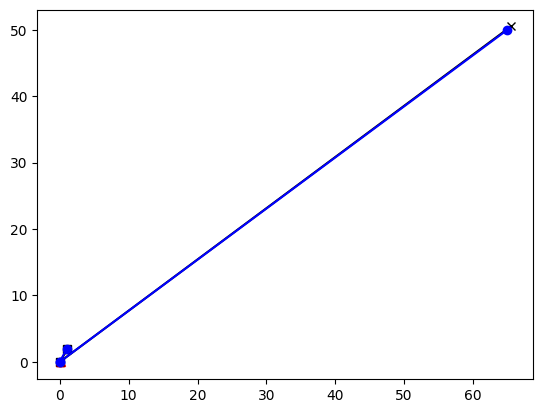

In [15]:
# D
plt.plot([0, b_data_epsilon[0, 0]], [0, b_data_epsilon[1, 0]], marker="s", color="black", label="b + epsilon")
plt.plot([0, b_data[0, 0]], [0, b_data[1, 0]], marker="o", color="blue", label="original b")
plt.plot([0, epsilon[0, 0]], [0, epsilon[1, 0]], marker="^", color="red", label="epsilon")
plt.plot([0, x_epsilon[0, 0]], [0, x_epsilon[1, 0]], marker="x", color="black", label="x after epsilon")
plt.plot([0, x[0, 0]], [0, x[1, 0]], marker="o", color="blue", label="x before epsilon")

# It's so sensitive because the scaling by A is so significant

In [16]:
# E
# don't think we've discussed condition numbers in class yet.
# I prompted ChatGPT with "what is a condition number?"

print(f"condition number: {np.linalg.cond(A)}") # BAD

condition number: 65.98484500494115


In [17]:
# F
# In my answer to (E), ChatGPT discussed this, including `cond = s.max() / s.min()`

U, S, Vh = np.linalg.svd(A)

print(f"singular values of A: {S}")

# The condion number is the ration between the largest and smallest singular value, as described above
print(f"ratio: {S.max()/S.min()}, condition number: {np.linalg.cond(A)}")

singular values of A: [1.62462113 0.02462113]
ratio: 65.98484500494115, condition number: 65.98484500494115


In [18]:
# G
# I was unsure about the symbol † here and asked ChatGPT: "explain the symbol †"
eigenvals, _ = np.linalg.eig((A.T@A))
eigenvals_sq = np.array([e**0.5 for e in eigenvals])

print(f"squared eigenvalues: {eigenvals_sq}")
print(f"singular values: {S}")
print(f"ratio: {eigenvals_sq.max()/eigenvals_sq.min()}, condition number: {np.linalg.cond(A)}.\n",
      "This is also the same (besides rounding error)")



squared eigenvalues: [0.02462113 1.62462113]
singular values: [1.62462113 0.02462113]
ratio: 65.9848450049453, condition number: 65.98484500494115.
 This is also the same (besides rounding error)


In [19]:
# H
# I've done this in line with each step.
# In summary, the ratio between max/min singular values is the same as between
# the square roots of max/min eigenvalues.
# This ratio is the condition number and relates to how much a matrix changes the norms of vector input/output

## HW 11

In [20]:
# Import image (the strategy to use PIL and these two lines are copied from ChatGPT)
img = Image.open("./weathered-face.jpg").convert("L")  # "L" = 8-bit grayscale
arr = np.array(img)

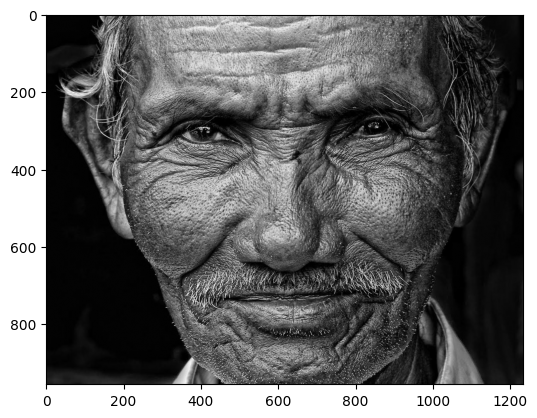

In [21]:
U, S, Vh = np.linalg.svd(arr)

plt.imshow(arr, cmap="grey")

In [22]:
# A
print(f"A has {len(S)} singular values, including {len([s for s in S if s!=0])} that are non-zero")

A has 956 singular values, including 956 that are non-zero


In [23]:
# B
print("Here are the largest singular values:")
S[0:5]


Here are the largest singular values:


array([93385.15719066, 16397.45225107, 13884.22822922, 11364.03379737,
        9404.99441109])

In [ ]:
# C -- A_10
number_to_approx = 10
s_approx = S[0:number_to_approx]
sig_approx = np.diag(s_approx)
u_approx = U[0:number_to_approx, :]
vh_approx = Vh[:, 0:number_to_approx]
A_approx = u_approx@sig_approx@vh_approx

plt.imshow(A_approx, cmap="grey")

# I ran out of time before I could debug this.

# (D) I would guess 20

## Acknowledgment
Work in this repository and with associated assignments and projects may be adapted or copied from similar files used in my prior academic and industry work (e.g., using a LaTeX file or Dockerfile as a starting point). Those files and any other work in this repository may have been developed with the help of LLM's like ChatGPT. For example, to provide context, answer questions, refine writing, understand function call syntax, and assist with repetitive tasks. In these cases, deliverables and associated work reflect my best efforts to optimize my learning and demonstrate my capacity, while using available resources and LLM's to facilitate the process.


[ChatGPT Conversation](https://chatgpt.com/share/68cb3ea3-18b8-8003-beb9-0e53865295bb)